In [6]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
X = load_boston().data
Y = load_boston().target

In [7]:
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=.33)

In [8]:
scaler = preprocessing.StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

## 1. Custom SGD implementation

In [9]:
from CustomSGD import CustomSGDLinearRegressor

In [10]:
model = CustomSGDLinearRegressor(learning_rate = 1, iters = 1000, k_rand_points = 200)

### 1.1 Finding best weights using <font color='red'>CustomSGD</font>

In [11]:
model.fit(X_tr, y_tr)

print('Custom SGD Weights:\n\n', model.w)

print('\nCustom SGD MSE:', mean_squared_error(y_te, model.predict(X_te)))

Custom SGD Weights:

 [-0.99377211  0.84333785  0.05376366  0.68710261 -2.413317    2.68660323
  0.42309656 -2.82656189  2.55070237 -1.24637489 -2.41001242  1.25290507
 -3.79764787]

Custom SGD MSE: 16.24592814371257


### 1.2 Plotting Actual vs Predicted values for <font color='red'>CustomSGD</font>

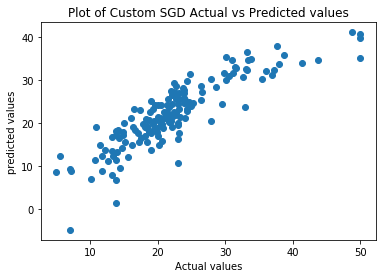

In [12]:
plt.scatter(y_te, model.predict(X_te))
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Plot of Custom SGD Actual vs Predicted values')
plt.show()

## 2. SKLearn SGDRegressor

In [13]:
clf = SGDRegressor()

### 2.1 Finding best weights using SKLearn <font color='red'>SGDRegressor</font>

In [14]:
clf.fit(X_tr, y_tr)

print('SKLearn\'s SGD Regressor Weights:\n\n', clf.coef_)

print('\nSKLearn\'s SGD Regressor MSE:', mean_squared_error(y_te, clf.predict(X_te)))

SKLearn's SGD Regressor Weights:

 [-0.65919238  0.55712516 -0.20876239  0.93021679 -0.94227842  3.08688399
  0.18200015 -1.55473988  0.78751507 -0.23331244 -2.02449104  1.02923763
 -3.53414153]

SKLearn's SGD Regressor MSE: 17.146507496544164


### 1.2 Plotting Actual vs Predicted values for SKLearn <font color='red'>SGDRegressor</font>

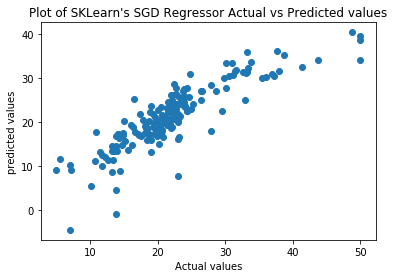

In [15]:
plt.scatter(y_te, clf.predict(X_te))
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Plot of SKLearn\'s SGD Regressor Actual vs Predicted values')
plt.show()

## 3. Weights of <font color='red'>SGDRegressor</font> vs <font color='red'>CustomSGD</font>

In [16]:
pt = PrettyTable()
pt.field_names = ['Component of Weight', 'SKLearn SGDRegressor', 'Custom SGD']

for idx, weights in enumerate(zip(clf.coef_, model.w)):
    pt.add_row([ idx+1, *weights ])

print(pt)

+---------------------+----------------------+----------------------+
| Component of Weight | SKLearn SGDRegressor |      Custom SGD      |
+---------------------+----------------------+----------------------+
|          1          | -0.6591923837934391  | -0.9937721062854946  |
|          2          |  0.5571251561273055  |  0.843337853827574   |
|          3          | -0.20876238843134085 | 0.053763664420212964 |
|          4          |  0.930216791037856   |  0.687102611155526   |
|          5          | -0.9422784245160964  |  -2.413317004807135  |
|          6          |  3.086883992239202   |  2.686603230023508   |
|          7          | 0.18200014555604183  |  0.4230965601666084  |
|          8          | -1.5547398821896363  | -2.8265618897646148  |
|          9          |  0.7875150683408665  |  2.550702372628207   |
|          10         | -0.23331243737395627 | -1.2463748901769063  |
|          11         |  -2.024491038272442  |  -2.410012419628901  |
|          12       

## 4. Mean Squared Error of  <font color='red'>SGDRegressor</font> vs <font color='red'>CustomSGD</font>

In [17]:
pt = PrettyTable()

pt.field_names = ['Metric', 'SKLearn SGDRegressor', 'Custom SGDLinearRegressor']

pt.add_row(['MSE', mean_squared_error(y_te, clf.predict(X_te)), mean_squared_error(y_te, model.predict(X_te))])

print(pt)

+--------+----------------------+---------------------------+
| Metric | SKLearn SGDRegressor | Custom SGDLinearRegressor |
+--------+----------------------+---------------------------+
|  MSE   |  17.146507496544164  |     16.24592814371257     |
+--------+----------------------+---------------------------+
